**文字处理与Amazon评论NLP分析案例**
1. python文字处理基本操作
2. ASCII，unicode 解码与编码utf-8
3. nltk工具包与特朗普的任职演讲
4. Amazon 评论分析案例


    4.1 读取文字
    
    4.2 整理标签
    
    4.3 清理文字并建语料库
    
    4.4 建模
    
    4.5 模型结果
 

In [1]:
import numpy as np

In [2]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

1. python文字处理基本操作

转义字符 \

文字拼接 s1+s2

文字长度 s.len()

取字母 s[3]

大小写 s.lower()  s.upper()

去除末尾空格 s.strip()

是不是字母 s.isalpha()

是不是数字 s.isdigit() ##只有s是整数时，才会TRUE

是不是空格 s.isspace()

从哪里开始 s.startswith('other')

从哪里结束 s.endswith('other')

查找相应字符 s.find('other'),返回首个字母的序号，若没有，就返回-1

替换 s.replace('old','new')

s.split('.') 用.去分割

'*'.join(list) 用*去拼接


In [5]:
word=r"I'm yours"
word

"I'm yours"

In [6]:
word="I\'m yours"
word

"I'm yours"

In [7]:
word='I\'m yours'
word

"I'm yours"

打开文件

In [6]:
with open ('data/Trump.txt',encoding='gbk') as f:
    i=0
    for i in f:
        print(i)


Thank you. Thank you very much, everyone. Sorry to keep you waiting. Complicated business, complicated. Thank you very much.



I’ve just received a call from secretary Clinton. She congratulated us. It’s about us. On our victory, and I congratulated her and her family on a very, very hard-fought campaign.



I mean she fought very hard. Hillary has worked very long and very hard over a long period of time, and we owe her a major debt of gratitude for her service to our country.



I mean that very sincerely. Now it is timefor America to bind the wounds of division, have to get together, to all Republicans and Democrats and independents across this nation I say it is time for us to come together as one united people.



It is time. I pledge to every citizen of our land that I will be president for all of Americans, and this is so important to me. For those who have chosen not to support me in the past, of which there were a few people, I’m reaching out to you for your guidance and your

2. ASCII，unicode 解码与编码utf-8

2.1 ASCII 

32-47 标点空格等符号

48-57 0-9十个阿拉伯数字

65-90 26个大写英文字母

97-122 26个小写英文字母

In [22]:
chr(97) ##查看10进制的数对应ASCII里面的内容

'a'

In [21]:
#ASCII转为10进制的数
ord('a')

97

**2.2 Unicode**

ASCII码不够用啊 127能干啥？

    Unicode的发展
        早期2个字节65536=2^8*2^8  #8个bit是一个字节，共有256种不同的可能；
        后期4个字节2^8*2^8*2^8*2^8
        用的最多的是哪些？
        如何表示这些序号最省空间？utf-8字节长度可变编码

In [24]:
print(u'\u0034')

4


In [1]:
u'\u0034'

'4'

unicode的中文

    变量可以保存中文的unicode序号，python2可显示unicode的序号，python3只显示对应的符号
    
    使用print函数直接打印中文符号的unicode序号，会打印出相应的字符

In [2]:
u'我'

'我'

In [3]:
u'\u6211'

'我'

In [5]:
data=u'我爱北京天安门'
data

'我爱北京天安门'

In [6]:
data_in_a_file=data.encode('utf-8')
data_in_a_file

b'\xe6\x88\x91\xe7\x88\xb1\xe5\x8c\x97\xe4\xba\xac\xe5\xa4\xa9\xe5\xae\x89\xe9\x97\xa8'

In [7]:
data_in_a_file.decode('utf-8')

'我爱北京天安门'

In [8]:
for unicode_zi in data_in_a_file.decode('utf-8'):
    print(unicode_zi)

我
爱
北
京
天
安
门


In [9]:
type(data_in_a_file)

bytes

英文
    
    在python2,3下，都是直接显示实际字符，不显示unicode的序号

In [10]:
tmp_h=u'Hello'
tmp_h

'Hello'

In [11]:
u'\u0048'

'H'

**3.nltk工具**

分析特朗普总统的任职演讲稿
    
    nltk一般使用
        共同出现的上下文 text.concordance
        词语的分布图 text.dispersion_plot
    读取并简单计算特朗普总统的任职演讲稿

3.1 nltk的一般使用

In [13]:
import nltk

In [19]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /Users/liu/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [21]:
nltk.download('genesis')

[nltk_data] Downloading package genesis to /Users/liu/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


True

In [24]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /Users/liu/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [26]:
nltk.download('nps_chat')

[nltk_data] Downloading package nps_chat to /Users/liu/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.


True

In [28]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /Users/liu/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [30]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /Users/liu/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [31]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [8]:
import matplotlib


In [9]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
text7

<Text: Wall Street Journal>

找出week在第二个语料库中的上下文 text2.concordance('week')

In [16]:
text2.concordance('week')

Displaying 25 of 34 matches:
Elinor should not be exposed another week to such insinuations . In this state
riches , was led before the end of a week to hope and expect it ; and secretly
 and they had not known each other a week , I believe , before you were certai
 If he is not here by the end of the week , I shall go after him ." " Ay , so 
 One evening in particular , about a week after Colonel Brandon left the count
s intentions . One morning , about a week after his leaving the country , Mari
on it . CHAPTER 19 Edward remained a week at the cottage ; he was earnestly pr
t still , go he must . Never had any week passed so quickly -- he could hardly
, he must leave them at the end of a week , in spite of their wishes and his o
go , for the Westons come to us next week you know . It was quite a sudden thi
 in a scene of similar distress last week , some apricot marmalade had been su
as in full force at the end of every week , they were prevailed on to stay nea
ir departure took place

画出第四个语料库中关键词的分布：text4.dispersion_plot(["citizen","democracy","freedom","duties","America"])

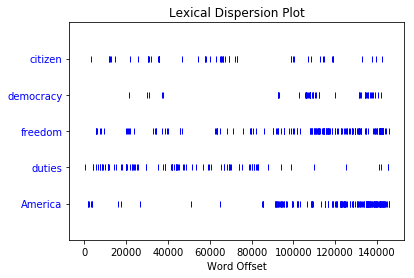

In [18]:
text4.dispersion_plot(["citizen","democracy","freedom","duties","America"])#从前往后看出现的频率

数一下第五个语料库中表情符号的个数：text5.count('lol')

In [19]:
text5.count('lol')

704

**3.2 计算特朗普的总统任职演讲**

读取

分词

制作自己的nltk.Text 对象

绘制关键词语分布图

查找最热的长度为2的短语

计算词频

频率最高的词语或符号

累计统计图

用词多样化的程度

In [5]:
#读取
with open('data/trump.txt','r',encoding='gbk') as f:
    trump=f.read()

In [6]:
trump

'Thank you. Thank you very much, everyone. Sorry to keep you waiting. Complicated business, complicated. Thank you very much.\n\nI’ve just received a call from secretary Clinton. She congratulated us. It’s about us. On our victory, and I congratulated her and her family on a very, very hard-fought campaign.\n\nI mean she fought very hard. Hillary has worked very long and very hard over a long period of time, and we owe her a major debt of gratitude for her service to our country.\n\nI mean that very sincerely. Now it is timefor America to bind the wounds of division, have to get together, to all Republicans and Democrats and independents across this nation I say it is time for us to come together as one united people.\n\nIt is time. I pledge to every citizen of our land that I will be president for all of Americans, and this is so important to me. For those who have chosen not to support me in the past, of which there were a few people, I’m reaching out to you for your guidance and you

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/liu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
#分词
tokens=nltk.word_tokenize(trump)
text=nltk.Text(tokens)


In [15]:
print(tokens)


['Thank', 'you', '.', 'Thank', 'you', 'very', 'much', ',', 'everyone', '.', 'Sorry', 'to', 'keep', 'you', 'waiting', '.', 'Complicated', 'business', ',', 'complicated', '.', 'Thank', 'you', 'very', 'much', '.', 'I', '’', 've', 'just', 'received', 'a', 'call', 'from', 'secretary', 'Clinton', '.', 'She', 'congratulated', 'us', '.', 'It', '’', 's', 'about', 'us', '.', 'On', 'our', 'victory', ',', 'and', 'I', 'congratulated', 'her', 'and', 'her', 'family', 'on', 'a', 'very', ',', 'very', 'hard-fought', 'campaign', '.', 'I', 'mean', 'she', 'fought', 'very', 'hard', '.', 'Hillary', 'has', 'worked', 'very', 'long', 'and', 'very', 'hard', 'over', 'a', 'long', 'period', 'of', 'time', ',', 'and', 'we', 'owe', 'her', 'a', 'major', 'debt', 'of', 'gratitude', 'for', 'her', 'service', 'to', 'our', 'country', '.', 'I', 'mean', 'that', 'very', 'sincerely', '.', 'Now', 'it', 'is', 'timefor', 'America', 'to', 'bind', 'the', 'wounds', 'of', 'division', ',', 'have', 'to', 'get', 'together', ',', 'to', 'al

In [16]:
print(text)

<Text: Thank you . Thank you very much ,...>


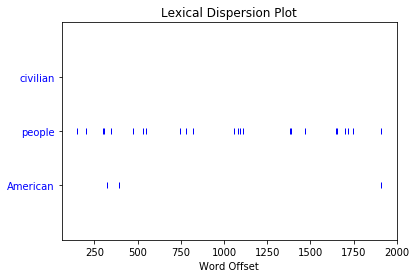

In [18]:
#绘制关键词语分布图
text.dispersion_plot(['civilian','people','American'])

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/liu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
#查找最热的长度为2的短语
text.collocations()

Secret Service; Tremendous potential; brother Robert; great job; get
along; great relationships; incredible people


In [23]:
#计算词频
text_fq=nltk.FreqDist(text)
text_fq

FreqDist({'.': 149, ',': 100, 'and': 69, 'to': 53, 'I': 50, '’': 42, 'you': 36, 'the': 35, 'is': 30, 'of': 29, ...})

In [24]:
text_fq.most_common(20) #得出出现次数最多的前20个词

[('.', 149),
 (',', 100),
 ('and', 69),
 ('to', 53),
 ('I', 50),
 ('’', 42),
 ('you', 36),
 ('the', 35),
 ('is', 30),
 ('of', 29),
 ('a', 28),
 ('will', 27),
 ('very', 24),
 ('people', 24),
 ('that', 22),
 ('our', 22),
 ('We', 19),
 ('have', 19),
 ('we', 18),
 ('great', 18)]

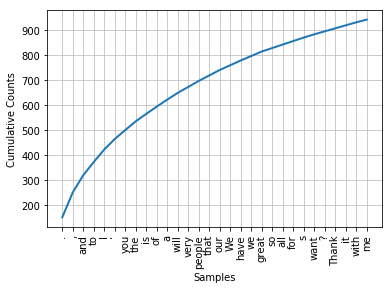

In [26]:
#词汇累计统计图
text_fq.plot(30,cumulative=True)

In [27]:
set(text)  #把text里面不同的词都取出来，相同的词只取一次

{'!',
 "''",
 ',',
 '.',
 '18-month',
 '200',
 '22',
 ':',
 '?',
 'A',
 'Again',
 'Agreat',
 'All',
 'Amazing',
 'America',
 'American',
 'Americans',
 'And',
 'Another',
 'As',
 'At',
 'Barron',
 'Belmont',
 'Ben',
 'Boy',
 'By',
 'Carson',
 'Chanting',
 'Chris',
 'Christie',
 'City',
 'Clinton',
 'Complicated',
 'David',
 'Democrats',
 'Don',
 'Donald',
 'Dr.',
 'END',
 'Elizabeth',
 'Eric',
 'Every',
 'Fantastic',
 'First',
 'Flynn',
 'For',
 'Fred',
 'Gen.',
 'Get',
 'Giuliani',
 'God',
 'Gov',
 'Great',
 'He',
 'Hillary',
 'Huckabee',
 'I',
 'Iread',
 'Is',
 'It',
 'Ivanka',
 'Jeff',
 'Kellogg',
 'Kellyanne',
 'Ladies',
 'Lara',
 'Let',
 'Like',
 'Look',
 'Marianne',
 'Melania',
 'Mike',
 'My',
 'Nah',
 'New',
 'No',
 'Not',
 'Nothing',
 'Now',
 'On',
 'Our',
 'Pence',
 'Priebus',
 'RNC',
 'Really',
 'Reince',
 'Republicans',
 'Robert',
 'Rudy',
 'Sarah',
 'Say',
 'Secret',
 'Service',
 'She',
 'So',
 'Sorry',
 'States',
 'Steve',
 'Thank',
 'That',
 'The',
 'These',
 'They',
 'Th

In [28]:
#词汇丰富的程度
def lexical_diversity(text):
    return len(set(text))/len(text)

In [29]:
lexical_diversity(text) #特朗普

0.28038325769036815

In [32]:
lexical_diversity(text2) #简 奥斯丁

0.04826383002768831

In [33]:
lexical_diversity(text4) #所有总统任职演讲

0.06692970116993173

In [36]:
len(text4)

145735

In [35]:
lexical_diversity(text7) # Wall Street 华尔街日报

0.12324685128531129

**4.Amazon评论分析**
    大概思路：利用正负面描述的**词语频率**预测Amazon的商品评价
        1. 读取文字描述，查看大概数据情况
        2. 整理标签
        3. 整理summary文字，并建立语料库
        4. 建模
        5. 结果

In [7]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn as sk
import os,time,re,string
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
%matplotlib inline

4.1 读取文字描述，查看大概数据情况

In [8]:
review_raw=pd.read_csv('data/Reviews.csv')
review_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
n_samples=review_raw.shape[0]
n_samples

568454

In [10]:
df_uni=pd.DataFrame(index=range(10),columns=['Feature','No. of NAs','No. of Unique Values','# of total samples','Unique_Percentage(%)'])
df_uni

,Feature,No. of NAs,No. of Unique Values,# of total samples,Unique_Percentage(%)
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [11]:
for i, feat in enumerate(review_raw.columns.values):
    feat_na=review_raw[feat].isnull().sum(axis=0)
    feat_uni=review_raw[feat].unique().shape[0]
    perc=feat_uni/n_samples*100
    df_uni.iloc[i,:]=[feat,feat_na,feat_uni,n_samples,perc]
df_uni

,Feature,No. of NAs,No. of Unique Values,# of total samples,Unique_Percentage(%)
0,Id,0,568454,568454,100
1,ProductId,0,74258,568454,13.0632
2,UserId,0,256059,568454,45.0448
3,ProfileName,16,218417,568454,38.423
4,HelpfulnessNumerator,0,231,568454,0.0406365
5,HelpfulnessDenominator,0,234,568454,0.0411643
6,Score,0,5,568454,0.000879579
7,Time,0,3168,568454,0.557301
8,Summary,27,295743,568454,52.0258
9,Text,0,393579,568454,69.2367


In [12]:
#去掉缺失值
review=review_raw.dropna()
review.shape

(568411, 10)

In [13]:
review_raw.shape

(568454, 10)

4.2 整理label,作为正负评价的标签

    将结果分为两类：positive(score>3) and negative(score<=3) 

In [14]:
label=review['Score'].apply(lambda x: 1 if x > 3 else 0)

In [15]:
tmp_df = pd.DataFrame([1,2,3,4],index=list(range(4)),columns=['t'])
tmp_df

,t
0,1
1,2
2,3
3,4


In [16]:
tmp_df['t'].apply(lambda x:x+1)

0    2
1    3
2    4
3    5
Name: t, dtype: int64

In [17]:
tmp_df['t'].apply(lambda x:100 if x%3==0 else 3)

0      3
1      3
2    100
3      3
Name: t, dtype: int64

4.3 整理summary文字栏

    去标点符号
    
    分词
    
    去掉stopwords
    
    词干提取stemming与词形还原Lemmatization
    
    清洗结果对比
    

In [18]:
summary=review['Summary']
summary.head(10)

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

In [3]:
#数据清洗：去掉标点符号
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
#python3的用法
trantable=str.maketrans("","",string.punctuation)
def data_clean(text):
    text=text.lower()
    #要去掉的元素放到text.translate的参数中
    text_clean=text.translate(trantable)
    return text_clean

In [5]:
l1="我##想**学好>自然语言处理"
data_clean(l1)

'我想学好自然语言处理'

In [6]:
l2="I'm rui"
data_clean(l2)

'im rui'

In [22]:
summary=summary.apply(lambda x:data_clean(x))
summary

0                                     good quality dog food
1                                         not as advertised
2                                       delight says it all
3                                            cough medicine
4                                               great taffy
5                                                nice taffy
6               great  just as good as the expensive brands
7                                     wonderful tasty taffy
8                                                yay barley
9                                          healthy dog food
10                          the best hot sauce in the world
11        my cats love this diet food better than their ...
12                     my cats are not fans of the new food
13                                         fresh and greasy
14                              strawberry twizzlers  yummy
15                   lots of twizzlers just what you expect
16                                      

In [23]:
#分词 tokenize
from nltk import word_tokenize

In [24]:
#取一部分做一个展示
demo=summary[:5000]
demo

0                                   good quality dog food
1                                       not as advertised
2                                     delight says it all
3                                          cough medicine
4                                             great taffy
5                                              nice taffy
6             great  just as good as the expensive brands
7                                   wonderful tasty taffy
8                                              yay barley
9                                        healthy dog food
10                        the best hot sauce in the world
11      my cats love this diet food better than their ...
12                   my cats are not fans of the new food
13                                       fresh and greasy
14                            strawberry twizzlers  yummy
15                 lots of twizzlers just what you expect
16                                             poor taste
17            

In [25]:
corpus_w_stopword=[word_tokenize(text) for text in demo]
corpus_w_stopword

[['good', 'quality', 'dog', 'food'],
 ['not', 'as', 'advertised'],
 ['delight', 'says', 'it', 'all'],
 ['cough', 'medicine'],
 ['great', 'taffy'],
 ['nice', 'taffy'],
 ['great', 'just', 'as', 'good', 'as', 'the', 'expensive', 'brands'],
 ['wonderful', 'tasty', 'taffy'],
 ['yay', 'barley'],
 ['healthy', 'dog', 'food'],
 ['the', 'best', 'hot', 'sauce', 'in', 'the', 'world'],
 ['my',
  'cats',
  'love',
  'this',
  'diet',
  'food',
  'better',
  'than',
  'their',
  'regular',
  'food'],
 ['my', 'cats', 'are', 'not', 'fans', 'of', 'the', 'new', 'food'],
 ['fresh', 'and', 'greasy'],
 ['strawberry', 'twizzlers', 'yummy'],
 ['lots', 'of', 'twizzlers', 'just', 'what', 'you', 'expect'],
 ['poor', 'taste'],
 ['love', 'it'],
 ['great', 'sweet', 'candy'],
 ['home', 'delivered', 'twizlers'],
 ['always', 'fresh'],
 ['twizzlers'],
 ['delicious', 'product'],
 ['twizzlers'],
 ['please', 'sell', 'these', 'in', 'mexico'],
 ['twizzlers', 'strawberry'],
 ['nasty', 'no', 'flavor'],
 ['great', 'bargain', '

In [26]:
#去掉stopwords
from nltk import FreqDist
from nltk.corpus import stopwords

In [27]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
#定义去除停用词的函数
def remove_stopword(text):
    return [word for word in text if word not in stopwords.words('english')]

In [29]:
#去除停用词，创建新的词库
corpus_wo_stopword=[remove_stopword(text) for text in corpus_w_stopword]
corpus_wo_stopword[:10]

[['good', 'quality', 'dog', 'food'],
 ['advertised'],
 ['delight', 'says'],
 ['cough', 'medicine'],
 ['great', 'taffy'],
 ['nice', 'taffy'],
 ['great', 'good', 'expensive', 'brands'],
 ['wonderful', 'tasty', 'taffy'],
 ['yay', 'barley'],
 ['healthy', 'dog', 'food']]

In [30]:
corpus_w_stopword[:10]

[['good', 'quality', 'dog', 'food'],
 ['not', 'as', 'advertised'],
 ['delight', 'says', 'it', 'all'],
 ['cough', 'medicine'],
 ['great', 'taffy'],
 ['nice', 'taffy'],
 ['great', 'just', 'as', 'good', 'as', 'the', 'expensive', 'brands'],
 ['wonderful', 'tasty', 'taffy'],
 ['yay', 'barley'],
 ['healthy', 'dog', 'food']]

In [31]:
corpus_wo_stopword_tmp=[]
for item in corpus_w_stopword:
    corpus_wo_stopword_tmp.append(remove_stopword(item))#元素整体增加

In [32]:
corpus_wo_stopword_tmp[:10]

[['good', 'quality', 'dog', 'food'],
 ['advertised'],
 ['delight', 'says'],
 ['cough', 'medicine'],
 ['great', 'taffy'],
 ['nice', 'taffy'],
 ['great', 'good', 'expensive', 'brands'],
 ['wonderful', 'tasty', 'taffy'],
 ['yay', 'barley'],
 ['healthy', 'dog', 'food']]

In [33]:
corpus_wo_stopword_tmp2=[]
for item in corpus_w_stopword:
    corpus_wo_stopword_tmp2.extend(remove_stopword(item))#元素打散增加

In [34]:
corpus_wo_stopword_tmp2[:10]

['good',
 'quality',
 'dog',
 'food',
 'advertised',
 'delight',
 'says',
 'cough',
 'medicine',
 'great']

In [35]:
corpus_wo_h=np.hstack(corpus_wo_stopword)

In [36]:
corpus_wo_h[:10]

array(['good', 'quality', 'dog', 'food', 'advertised', 'delight', 'says',
       'cough', 'medicine', 'great'], dtype='<U32')

In [37]:
#计算有多少不重复的词汇
corpus_wo_h=np.hstack(corpus_wo_stopword)
corpus_w_h=np.hstack(corpus_w_stopword)
print("考虑停止词，不重复词汇有%d"%(len(set(corpus_w_h))))
print("不考虑停止词，不重复词汇有%d"%(len(set(corpus_wo_h))))

考虑停止词，不重复词汇有3301
不考虑停止词，不重复词汇有3187


In [38]:
#词干提取(分词形式)与词性还原（单复数）
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer


In [39]:
porter=PorterStemmer()
wnl=WordNetLemmatizer()

In [40]:
print('eating 词干是%s'%(porter.stem('eating')))

eating 词干是eat


In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/liu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
print('eating 词性还原后是%s'%(wnl.lemmatize('eating')))

eating 词性还原后是eating


In [43]:
print('feet 词性还原后是%s'%(wnl.lemmatize('feet')))

feet 词性还原后是foot


In [44]:
stem_wo=[porter.stem(word) for word in corpus_wo_h]
lem_wo=[wnl.lemmatize(word) for word in corpus_wo_h]

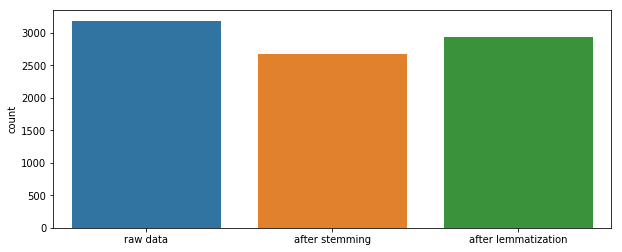

In [45]:
#清洗结果对比--提取词干，还原词性
plt.figure(figsize=(10,4))
sns.barplot(x=['raw data','after stemming','after lemmatization'],
           y=[len(set(corpus_wo_h)),len(set(stem_wo)),len(set(lem_wo))])
plt.ylabel('count')
plt.show()

In [46]:
#去除stopwords后的词频
fdist_wo=pd.DataFrame(list(FreqDist(corpus_wo_h).items()),columns=['单词without','词频without'])
fdist_wo.sort_values(by='词频without',inplace=True, ascending=False)

In [47]:
fdist_w=pd.DataFrame(list(FreqDist(corpus_w_h).items()),columns=['单词with','词频with'])
fdist_w.sort_values(by='词频with',inplace=True, ascending=False)

In [48]:
#fdist_wo.head

In [49]:
fdist_w.head(5)

,单词with,词频with
290,great,690
3082,the,482
334,good,479
3039,for,384
796,best,341


In [50]:
fdist_wo.head(5)

,单词without,词频without
284,great,690
328,good,479
773,best,341
2820,love,215
1621,taste,179


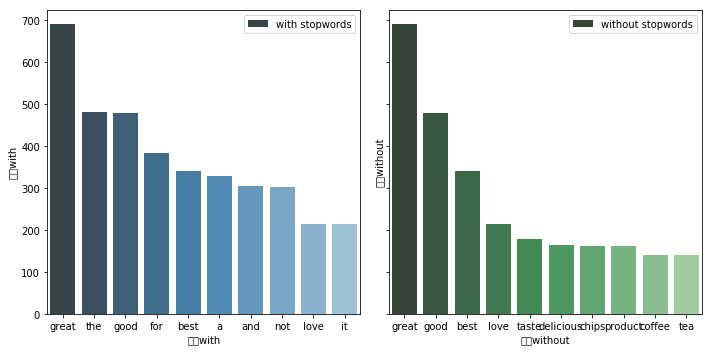

In [51]:
#可视化结果
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,5))

sns.barplot(x=fdist_w['单词with'][:10],
            y=fdist_w['词频with'][:10],
            palette='Blues_d',
            ax=ax1,
            label='with stopwords')

sns.barplot(x=fdist_wo['单词without'][:10],
            y=fdist_wo['词频without'][:10],
            palette='Greens_d',
            ax=ax2,
            label='without stopwords')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [52]:
#查看热门短语
from nltk import ngrams

In [53]:
def get_ngrams(text,n=2):
    return ngrams(text,n)

In [54]:
#例子
s='I love data mining'

s_token=word_tokenize(s)

print(s_token)

['I', 'love', 'data', 'mining']


In [55]:
print(list(get_ngrams(s_token)))

[('I', 'love'), ('love', 'data'), ('data', 'mining')]


In [56]:
bigram_w=[]
for token in corpus_w_stopword:
    bigram=nltk.bigrams(token)
    for item in bigram:
        bigram_w.append(item)
        
bigram_wo=[]
for token in corpus_wo_stopword:
    bigram=nltk.bigrams(token)
    for item in bigram:
        bigram_wo.append(item)

In [57]:
len(bigram_w)

14993

In [58]:
len(bigram_wo)

9399

In [59]:
bifq=FreqDist(bigram_wo)
bifq.most_common(20)#返回频率最高的前20

[(('great', 'product'), 64),
 (('dog', 'food'), 60),
 (('gluten', 'free'), 48),
 (('hot', 'cocoa'), 43),
 (('great', 'taste'), 36),
 (('hot', 'chocolate'), 33),
 (('pretty', 'good'), 31),
 (('pop', 'chips'), 25),
 (('great', 'price'), 25),
 (('great', 'tasting'), 24),
 (('really', 'good'), 22),
 (('dog', 'loves'), 22),
 (('good', 'stuff'), 21),
 (('good', 'product'), 19),
 (('green', 'tea'), 18),
 (('great', 'coffee'), 18),
 (('good', 'price'), 16),
 (('great', 'dog'), 16),
 (('great', 'value'), 16),
 (('much', 'better'), 15)]

In [60]:
#将语料库中的bigram词频转化成dataframe格式
bi_fd_w=pd.DataFrame(list(FreqDist(bigram_w).items()),columns=['bi_w','bicounts_w'])
bi_fd_wo=pd.DataFrame(list(FreqDist(bigram_wo).items()),columns=['bi_wo','bicounts_wo'])

In [61]:
#排序
bi_fd_w.sort_values(by='bicounts_w',inplace=True,ascending=False) #inplace在原变量里面替换，ascending升序
bi_fd_wo.sort_values(by='bicounts_wo',inplace=True,ascending=False)

In [62]:
bi_fd_w.head()

,bi_w,bicounts_w
7835,"(the, best)",139
2366,"(great, product)",64
7447,"(dog, food)",60
7597,"(love, it)",58
1960,"(great, for)",51


In [63]:
bi_fd_wo.head()

,bi_wo,bicounts_wo
1745,"(great, product)",64
5508,"(dog, food)",60
2938,"(gluten, free)",48
2280,"(hot, cocoa)",43
1157,"(great, taste)",36


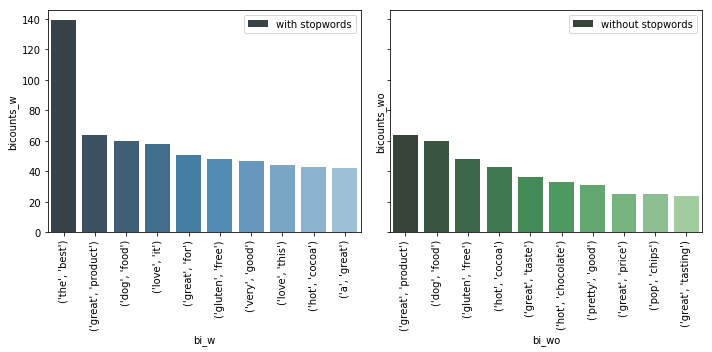

In [64]:
#可视化
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,5))

sns.barplot(x=bi_fd_w['bi_w'][:10],
            y=bi_fd_w['bicounts_w'][:10],
            palette='Blues_d',
            ax=ax1,
            label='with stopwords')

sns.barplot(x=bi_fd_wo['bi_wo'][:10],
            y=bi_fd_wo['bicounts_wo'][:10],
            palette='Greens_d',
            ax=ax2,
            label='without stopwords')
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(),rotation=90)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(),rotation=90)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**4.4 建模**

    数据预处理
    
    tfidf处理，转化为频率
    
    调用具体模型


In [65]:
#Data Preprocessing 数据预处理
def stem_tokens(tokens,stemmer=PorterStemmer()):
    stemmed=[]
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens=nltk.word_tokenize(text)
    #tokens=[word for word in tokens if word not in stopwords.words('english')]
    stems=stem_tokens(tokens)
    return ''.join(stems)

def build_corpus(dataset):
    corpus=[]
    for text in dataset:
        #without the decoding, there will be UnicodeDecodeError when tokenizing
        corpus.append(tokenize(text))
    return corpus

In [66]:
#在第二步已经去除了标点
n=1000
X=summary[:n]
y=label[:n]

In [67]:
#分成训练集和测试集
seed=2018
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed)

In [68]:
#建语料库
train_token=build_corpus(X_train)
test_token=build_corpus(X_test)

In [69]:
train_token[:10]

['itfabulbutnotfromamazon',
 'agreatallaroundmix',
 'toastsesamoil',
 'lovethefreshfoodfeeder',
 'awesom',
 'maybtheworstchipever',
 'happidog',
 'thebestchipever',
 'greatestoilsincslicebread',
 'notsure']

**进一步处理，计算单词出现的tf-idf频率：sklearn TfidfVectorizer**

    TF: term frequency 具体单词在某篇文章中的出现次数
    

\begin{equation*}
TF_{词i,文章j}=\frac{词i在文章j中的频数}{文章j中所有词的频数总和}
\end{equation*}
    
    IDF：inversed document frequency
    
\begin{equation*}
IDF_{词i}=log{\frac{所有文章的篇数总和}{带有词汇的文章篇数总和}}
\end{equation*}

    

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec=TfidfVectorizer()

X_train_tfidf_vec=tfidf_vec.fit_transform(train_token)
X_test_tfidf_vec=tfidf_vec.transform(test_token)

In [71]:
#查看结果
for item in X_test_tfidf_vec:
    print(item)
    print("---")

  (0, 297)	1.0
---

---
  (0, 149)	1.0
---

---

---
  (0, 499)	1.0
---
  (0, 269)	1.0
---

---

---

---
  (0, 149)	1.0
---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---
  (0, 149)	1.0
---

---

---

---

---

---

---
  (0, 729)	1.0
---
  (0, 251)	1.0
---
  (0, 264)	1.0
---

---

---

---
  (0, 234)	1.0
---

---

---

---

---

---

---
  (0, 589)	1.0
---
  (0, 300)	1.0
---
  (0, 714)	1.0
---

---
  (0, 609)	1.0
---

---

---

---
  (0, 149)	1.0
---

---
  (0, 297)	1.0
---

---

---

---

---

---

---

---

---

---

---

---

---

---
  (0, 310)	1.0
---

---

---
  (0, 251)	1.0
---

---

---

---

---

---

---

---

---

---

---

---
  (0, 71)	1.0
---

---

---

---

---

---

---

---

---

---

---
  (0, 9)	1.0
---

---

---

---

---

---

---

---

---
  (0, 256)	1.0
---

---

---

---
  (0, 297)	1.0
---
  (0, 714)	1.0
---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---



In [72]:
X_test_tfidf_vec.shape #200条评论，732个不同的单词

(200, 732)

In [73]:
tfidf_vec.get_feature_names() #查看都有哪些词语

['12proteinand50vitamina',
 '4downthedrain',
 '4starforpriceandtast',
 '50caloriofyummi',
 '70ofthechipinthebagareovercook',
 'abitonthestaleside',
 'absolutdelici',
 'absolutloveit',
 'absolutvile',
 'addict',
 'adorbasketmaknicepresent',
 'afantasthealthiproduct',
 'afavorit',
 'afragranttea',
 'agavnectar',
 'agavsyrup',
 'agreatallaroundmix',
 'agreatplacetostart',
 'ahmadloosimperiblendteaisgreatfortheprice',
 'ahugehitattheoffic',
 'ahugesuccess',
 'alittlmorewaterithanother2ndfoodforeb',
 'altoidsmall',
 'altoidsmallswintergreen',
 'alwayfresh',
 'amaz',
 'amazchip',
 'amazservic',
 'amaztothelastbite',
 'anacquirtast',
 'anaddictpotatochip',
 'andithoughkikkomanwagood',
 'anindulgwithabite',
 'annihomegrownorganwholewheatshellwhitecheddarmacaronichees6oz',
 'anothhusbandfavorit',
 'antioxidsmoothi',
 'arrivfast',
 'arrowheadmillwholegrainbuttermilkpancakareeasi',
 'asavegraceforgreenmountaincoffe',
 'aslighttastofjalapeno',
 'asparagubliss',
 'asurprisfind',
 'atangthatpackapun

In [74]:
#调用具体模型 train & predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [75]:
#逻辑回归
lr=LogisticRegression().fit(X_train_tfidf_vec,y_train)
ypred_lr=lr.predict(X_test_tfidf_vec)

/Users/liu/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
#RandomForestClassifier
models={}
models['lgr']=LogisticRegression()
models['RF']=RandomForestClassifier(n_estimators=50,max_depth=10)

In [77]:
from sklearn import metrics

In [78]:
#将结果保存在pd.DataFrame中
results=pd.DataFrame(index=models.keys(),columns=['f1_score','precision_score','recall_score','auc'])
for (clf_name,clf) in models.items():
    clf.fit(X_train_tfidf_vec,y_train)
    ypred=clf.predict(X_test_tfidf_vec)
    flscore=metrics.f1_score(y_test,ypred)
    precision=metrics.precision_score(y_test,ypred)
    recall=metrics.recall_score(y_test,ypred)
    auc=metrics.roc_auc_score(y_test,ypred)
    results.loc[clf_name,:]=[flscore,precision,recall,auc]

In [79]:
metrics.confusion_matrix(y_test,ypred_lr)

array([[  1,  33],
       [  0, 166]])

In [80]:
results

,f1_score,precision_score,recall_score,auc
lgr,0.909589,0.834171,1,0.514706
RF,0.907104,0.83,1,0.5


word=["I don't like this food"]
1. 去标点 data_clean
2. 分词 word_tokenize
3. 去stopword
4. tfidf sklearn TfidfVectorize
5. clf

In [81]:
word=["I don't like this food"]